<a href="https://colab.research.google.com/github/bellalee00/identifikasi_rempah/blob/main/identifikasi_rempah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import

In [1]:
import pandas as pd
from pandas import DataFrame
import os
from keras.preprocessing import image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Ganti path ini sesuai dengan lokasi dataset Anda di Google Drive
dataset_path = '/content/drive/My Drive/dataset_jahe_lengkuas'

# Menampilkan isi direktori untuk memastikan path benar
print(os.listdir(dataset_path))

['jahe', 'lengkuas', 'unknown']


In [3]:
# Path folder jahe dalam dataset rempah
jahe_folder = '/content/drive/My Drive/dataset_jahe_lengkuas/jahe'

# Menampilkan total jumlah gambar di folder jahe
len_jahe_folder = len(os.listdir(jahe_folder))
print("Total gambar jahe:", len_jahe_folder)

# Menampilkan 5 nama file gambar di folder jahe
jahe_files = os.listdir(jahe_folder)
print("5 data dalam folder jahe:")
jahe_temp = jahe_files[:5]
for i, file_jahe in enumerate(jahe_temp, start=1):
    print(f"{i}. {file_jahe}")

Total gambar jahe: 1000
5 data dalam folder jahe:
1. jahe(672).jpg
2. jahe(267).jpg
3. jahe(500).jpg
4. jahe(700).jpg
5. jahe(300).jpg


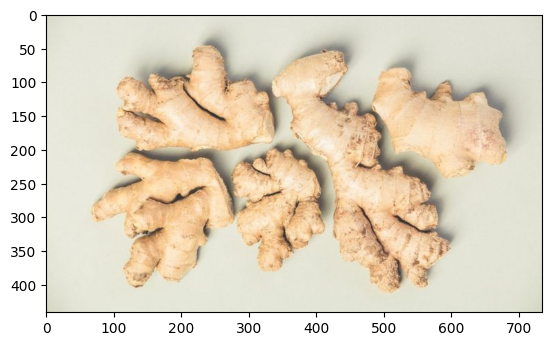

In [4]:
image_jahe = image.load_img('/content/drive/My Drive/dataset_jahe_lengkuas/jahe/jahe(700).jpg')
image_plot = plt.imshow(image_jahe)

In [5]:
# Path folder lengkuas dalam dataset rempah
lengkuas_folder = '/content/drive/My Drive/dataset_jahe_lengkuas/lengkuas'

# Menampilkan total jumlah gambar di folder lengkuas
len_lengkuas_folder = len(os.listdir(lengkuas_folder))
print("Total gambar lengkuas:", len_lengkuas_folder)

# Menampilkan 5 nama file gambar di folder lengkuas
lengkuas_files = os.listdir(lengkuas_folder)
print("5 data dalam folder lengkuas:")
lengkuas_temp = lengkuas_files[:5]
for i, file_lengkuas in enumerate(lengkuas_temp, start=1):
    print(f"{i}. {file_lengkuas}")

Total gambar lengkuas: 1000
5 data dalam folder lengkuas:
1. lengkuas(267).jpg
2. lengkuas(733).jpg
3. lengkuas(333).jpg
4. lengkuas(234).jpg
5. lengkuas(867).jpg


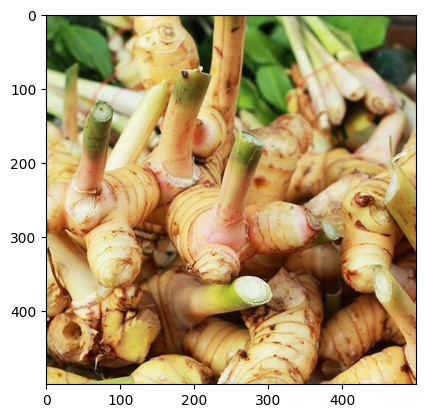

In [6]:
image_lengkuas = image.load_img('/content/drive/My Drive/dataset_jahe_lengkuas/lengkuas/lengkuas(733).jpg')
image_plot = plt.imshow(image_lengkuas)

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Mengubah ke categorical
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',  # Mengubah ke categorical
    subset='validation'
)


Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # Mengubah ke 3 kelas
])

# Kompilasi model
model.compile(loss='categorical_crossentropy',  # Mengubah ke categorical_crossentropy
              optimizer='adam',
              metrics=['accuracy'])

# Melatih model
history = model.fit(
    train_generator,
    epochs=15,
    validation_data=validation_generator
)


Epoch 1/15
75/75 [==============================] - 178s 2s/step - loss: 0.8930 - accuracy: 0.5858 - val_loss: 0.6239 - val_accuracy: 0.7700
Epoch 2/15
75/75 [==============================] - 184s 2s/step - loss: 0.4459 - accuracy: 0.8379 - val_loss: 0.3144 - val_accuracy: 0.8833
Epoch 3/15
75/75 [==============================] - 183s 2s/step - loss: 0.2194 - accuracy: 0.9237 - val_loss: 0.1896 - val_accuracy: 0.9550
Epoch 4/15
75/75 [==============================] - 190s 3s/step - loss: 0.0897 - accuracy: 0.9721 - val_loss: 0.1915 - val_accuracy: 0.9350
Epoch 5/15
75/75 [==============================] - 177s 2s/step - loss: 0.0708 - accuracy: 0.9796 - val_loss: 0.1105 - val_accuracy: 0.9717
Epoch 6/15
75/75 [==============================] - 189s 3s/step - loss: 0.0318 - accuracy: 0.9921 - val_loss: 0.1208 - val_accuracy: 0.9750
Epoch 7/15
75/75 [==============================] - 179s 2s/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.0761 - val_accuracy: 0.9850
Epoch 8/15
75

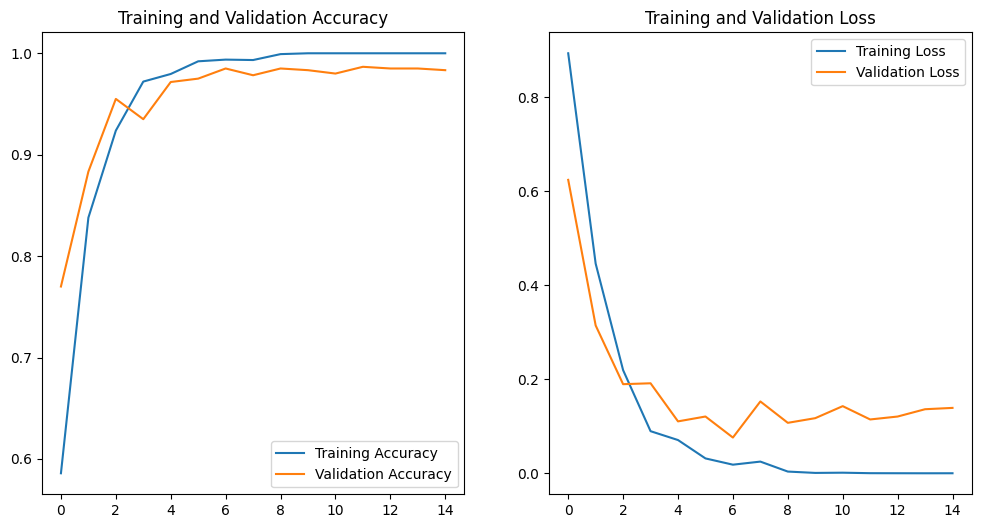

In [18]:
import matplotlib.pyplot as plt

# Plotting accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Saving Gambar (5).jpg to Gambar (5).jpg
1/1 [==============================] - 0s 118ms/step


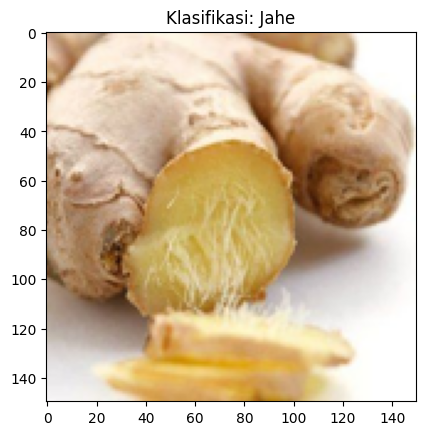

Gambar: Gambar (5).jpg -> Klasifikasi: Jahe


In [19]:
from google.colab import files
from PIL import Image
import numpy as np

def predict_image(image_path):
    img = Image.open(image_path)
    img = img.resize((150, 150))
    img_array = np.array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0]
    predicted_class = np.argmax(prediction)

    # Menambahkan logika untuk menentukan label
    labels = ['Jahe', 'Lengkuas', 'Unknown']
    label = labels[predicted_class]

    # Menampilkan gambar dengan label
    plt.figure()
    plt.imshow(img)
    plt.title(f"Klasifikasi: {label}")
    plt.axis('on')  # Mengaktifkan axis
    plt.show()

    return label

# Mengunggah dan memprediksi gambar baru
uploaded = files.upload()
for filename in uploaded.keys():
    label = predict_image(filename)
    print(f"Gambar: {filename} -> Klasifikasi: {label}")
